In [2]:
from post_parser_record import PostParserRecord
post_reader = PostParserRecord("Posts.xml")
!pip3 install nltk
!pip install matplotlib
!pip install pandas
!pip install wordcloud
!pip install textstat
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicdr_nactbrj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicdr_nactbrj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#creating index
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
stop_words.append("p")
inverted_index = {}
def update_index(text, document_id):
  temp_tokens = word_tokenize(re.sub(r'[^a-z]', ' ', text))
  #add stopwords here###########################
  #tokens = [i for i in temp_tokens if i not in stop_words]
  tokens = [i for i in temp_tokens if i != 'p']##################################
  for token in tokens:
      if token in inverted_index:
        if document_id in inverted_index[token]:
          inverted_index[token][document_id] += 1
        else:
          inverted_index[token][document_id] = 1
      else:
        inverted_index[token] = {document_id: 1}

  #print(tokens)
print("indexing questions...")
for question_id in post_reader.map_questions:
  question = post_reader.map_questions[question_id]
  title = question.title.lower().strip()
  body = question.body.lower().strip()
  text = title + " " + body
  update_index(text, question_id)
print("complete")
print("indexing answers...")
for answer_id in post_reader.map_just_answers:
  answer = post_reader.map_just_answers[answer_id]
  text = answer.body.lower().strip()
  update_index(text, answer_id)
print("Complete")
#print(inverted_index)


indexing questions...
complete
indexing answers...
Complete


Question 1, WordCloud

With Stopwords
the             169332
a               164863
to              163257
i               158889
and             136670
in              128656
is              120930
it              120066
https           117448
com             112768
href            111900
of              111880
rel             107770
noreferrer      104318
alt             102290
img             101472
src             101373
imgur           100226
nofollow        100177
stack           99661


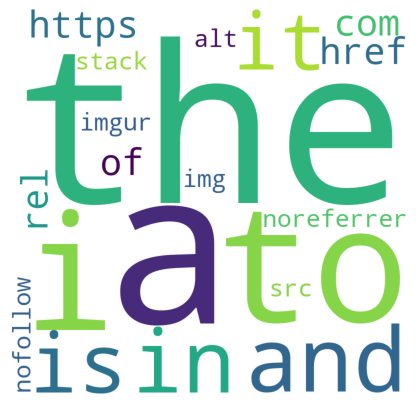

Without Stopwords
https       117448
com         112768
href        111900
rel         107770
noreferrer  104318
alt         102290
img         101472
src         101373
imgur       100226
nofollow    100177
stack       99661
image       85096
blender     73620
enter       73090
description 72340
png         69636
object      52849
use         46966
like        46037
using       42488


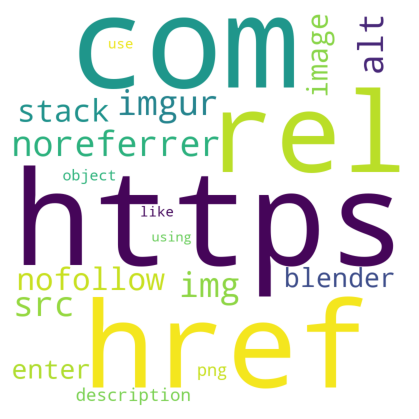

In [4]:
#question 1
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
stop_words = stopwords.words('english')
word_freq = {}
no_stopword_word_freq = {}

for word in inverted_index:
    temp_total_occurances = 0
    for document in inverted_index[word]:
        if word in word_freq:
            if word not in stop_words:
                no_stopword_word_freq[word] += 1
            word_freq[word] += 1
        else:
            if word not in stop_words:
                no_stopword_word_freq[word] = 1
            word_freq[word] = 1
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',max_words=20,
                min_font_size = 10).generate_from_frequencies(word_freq)
 
sortedlist = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
i = 0
print("With Stopwords")   
for items in sortedlist:
#makes sure only 10 of each pass are printed                  
    if i <= 19:
      print("%-12s"%items[0]+"    "+str(items[1]))
      i += 1
    else:
      break
# plot the WordCloud image 
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

print("Without Stopwords")
sortedlist = sorted(no_stopword_word_freq.items(), key=lambda x: x[1], reverse=True)
i = 0
for items in sortedlist:
#makes sure only 10 of each pass are printed
    if i <= 19:
      print("%-12s"%items[0]+str(items[1]))
      i += 1
    else:
      break
no_stopword_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',max_words=20,
                min_font_size = 10).generate_from_frequencies(no_stopword_word_freq)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(no_stopword_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [5]:
#Question 2
tag_index = {}
def count_tags(tags):
    for tag in tags:
      if tag in tag_index:
        tag_index[tag] += 1
      else:
        tag_index[tag] = 1

print("Counting Tags...")
for question_id in post_reader.map_questions:
  question = post_reader.map_questions[question_id]
  tag = question.tags
  count_tags(tag)
print("complete")
i = 0
#sorts dictionary of tags
sorted_tags = {}
sorted_tags = sorted(tag_index.items(), key=lambda item: item[1], reverse=True)
#prints top i tags
print("   tags   occurrences")
for tag in sorted_tags:
  if i <= 19:
    print(tag)
    i += 1
  else:
    break

Counting Tags...
complete
   tags   occurrences
('modeling', 12120)
('python', 10888)
('rendering', 9463)
('animation', 8784)
('cycles-render-engine', 8151)
('mesh', 7468)
('texturing', 6907)
('materials', 5802)
('scripting', 5424)
('modifiers', 4912)
('uv', 4469)
('rigging', 4271)
('node-editor', 3852)
('objects', 3367)
('3d-view', 2965)
('particles', 2830)
('armature', 2744)
('shaders', 2631)
('interface', 2467)
('export', 2368)


In [90]:
#Question 3

#function to count and return words in text
def count_words(text):
  temp_tokens = word_tokenize(re.sub(r'[^a-z]', ' ', text))
  tokens = [i for i in temp_tokens if i != 'p']
  return len(tokens)

#function to count and return sentences in text
def count_sentences(text):
  sentences = sent_tokenize(text)
  return len(sentences)

#initalize variables
document_count = 0
total_word_count = 0
total_sentence_count = 0

#questions
print("counting questions...")
for question_id in post_reader.map_questions:
  document_count += 1
  question = post_reader.map_questions[question_id]
  title = question.title.lower().strip()
  body = question.body.lower().strip()
  text = title + " " + body
  total_sentence_count += count_sentences(text)
  total_word_count += count_words(text)
print("complete")
print("the average number of words in questions is: " + str("{:.2f}".format(total_word_count/document_count)))
print("the average number of sentences in questions is: " + str("{:.2f}".format(total_sentence_count/document_count)))

#reinitalize for answers
total_word_count = 0
document_count = 0
total_sentence_count = 0

#answers
print("counting answers...")
for answer_id in post_reader.map_just_answers:
  document_count += 1
  answer = post_reader.map_just_answers[answer_id]
  text = answer.body.lower().strip()
  total_sentence_count += count_sentences(text)
  total_word_count += count_words(text)
print("Complete")
print("the average number of words in answers is: " + str("{:.2f}".format(total_word_count/document_count)))
print("the average number of sentences in answers is: " + str("{:.2f}".format(total_sentence_count/document_count)))

counting questions...
complete
the average number of words in questions is: 145.39
the average number of sentences in questions is: 4.44
counting answers...
Complete
the average number of words in answers is: 152.97
the average number of sentences in answers is: 3.55


In [107]:
#Question 4
#initalize variables
question_count = 0
questions_without_answers = 0
questions_with_accepted_answers = 0
#calculates question stats
print("counting questions...")
for question_id in post_reader.map_questions:
  question_count+=1
  question = post_reader.map_questions[question_id]
  if question.answer_count == 0:
    questions_without_answers+=1
  if question.accepted_answer_id != None:
    questions_with_accepted_answers+=1
print("complete")

#counts total answers
answer_count = 0
print("counting answers...")
for answer_id in post_reader.map_just_answers:
  answer_count+=1
print("Complete")
print("the number of questions without answers is: "+str(questions_without_answers))
print("number of questions with accepted answers is: "+str(questions_with_accepted_answers))
print("the average number of questions per answer is: "+str("{:.4f}".format(answer_count/question_count)))


counting questions...
complete
counting answers...
Complete
the number of questions without answers is: 30153
number of questions with accepted answers is: 34592
the average number of questions per answer is: 0.9241


Question 5
for the most part what i have noticed, is that most of the unanswered questions, result from complicated questions. 

In [120]:
#Question 6
count = 0
print("processing questions...")
for question_id in post_reader.map_questions:
  question = post_reader.map_questions[question_id]
  if question.accepted_answer_id is not None:
    if question.answers[0] == post_reader.map_just_answers[question.accepted_answer_id]:
        count+=1
print("complete")
print(str(count)+" of the accepted answers are the first answers that were posted")

processing questions...
complete
34019 of the accepted answers are the first answers that were posted


In [124]:
#Question 7
import textstat
average_with_answer = 0
average_without_answer = 0
print("calculating readibality...")
for question_id in post_reader.map_questions:
  question = post_reader.map_questions[question_id]
  title = question.title.lower().strip()
  body = question.body.lower().strip()
  text = title + " " + body
  readibality = textstat.flesch_reading_ease(text)
  if question.answers is not None:
    average_with_answer += readibality
    average_with_answer = average_with_answer/2
  else:
    average_without_answer += readibality
    average_without_answer = average_without_answer/2
print("Complete")
print("average readibality of questions with answers is: "+str(average_with_answer))
print("average readibality of questions without answers is: "+str(average_without_answer))

calculating readibality...
Complete
average readibality of questions with answers is: 66.48461382360969
average readibality of questions without answers is: 62.435899106342546


In [5]:
#Question 8
count = 0
question1 = post_reader.map_questions[176]
text1 = (question1.title + " " + question1.body).lower().split(" ")
final_text1 = set(text1)
question2 = post_reader.map_questions[164]
text2 = (question1.title + " " + question1.body).lower().split(" ")
final_text2 = set(text2)

for token in final_text1:
  if token in final_text2:
    count +=1
print("simular words in documents " + str(count))

simular words in documents 49


In [22]:
#Question 10
largest_count = 0
largest_count_id = 0
for question_id in post_reader.map_questions:
  question = post_reader.map_questions[question_id]
  if question.answer_count >= largest_count:
    largest_count = question.answer_count  
    largest_count_id = question_id
print("Question "+str(largest_count_id) + " has " +str(largest_count)+" answers")


Question 100203 has 22 answers
